# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

# Preprocessing 

In [2]:
# Read Data
X_train_full_raw = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', index_col='Id')
X_test_full_raw = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv', index_col='Id')

In [3]:
X_train_full_raw.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(f"X_train_full_raw.shape: {X_train_full_raw.shape}")
print(f"X_test_full_raw.shape: {X_test_full_raw.shape}")

X_train_full_raw.shape: (1460, 80)
X_test_full_raw.shape: (1459, 79)


In [5]:
X_train_full = X_train_full_raw.copy()
X_test_full = X_test_full_raw.copy()

In [6]:
X_train_full.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [7]:
# Check for missing values
missing_values = X_train_full.isnull().sum().sort_values(ascending=False)
missing_values[missing_values != 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [8]:
# Identify columns to drop: missing values with over 20% of dataset
columns_to_drop = missing_values[missing_values >= 1460*0.2].index
print(f"Columns to drop: {columns_to_drop.tolist()}")

# Drop columns from the dataset
X_train_full = X_train_full.drop(columns=columns_to_drop, axis=1)
X_test_full = X_test_full.drop(columns=columns_to_drop, axis=1)

Columns to drop: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']


In [9]:
# Check the consistency of train, test data
print(f"X_train_full.shape: {X_train_full.shape}")
print(f"X_test_full.shape: {X_test_full.shape}")

X_train_full.shape: (1460, 74)
X_test_full.shape: (1459, 73)


In [10]:
# Remove rows with missing target, separate target from predictors
X_train_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_train_full['SalePrice']

X_train_full.drop(['SalePrice'], axis=1, inplace=True)

In [11]:
train_X, val_X, train_y, val_y = train_test_split(X_train_full, y, test_size=0.2, random_state=1)

print(f"Train.shape = {train_X.shape, train_y.shape}")
print(f"Validation.shape = {val_X.shape, val_y.shape}")

Train.shape = ((1168, 73), (1168,))
Validation.shape = ((292, 73), (292,))


In [12]:
# Select categorical columns
categorical_cols = X_train_full.select_dtypes(include='object').columns

# Select numerical columns
numerical_cols = X_train_full.select_dtypes(include=['int64', 'float64']).columns

# EDA

### Understand the Target Variable (SalePrice)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


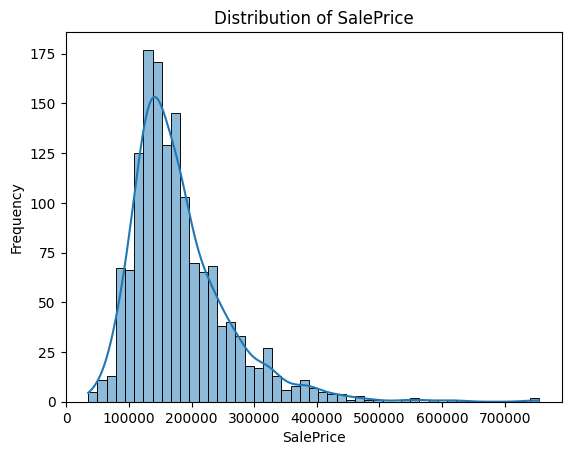

In [13]:
sns.histplot(y, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

### Explore Numerical Features


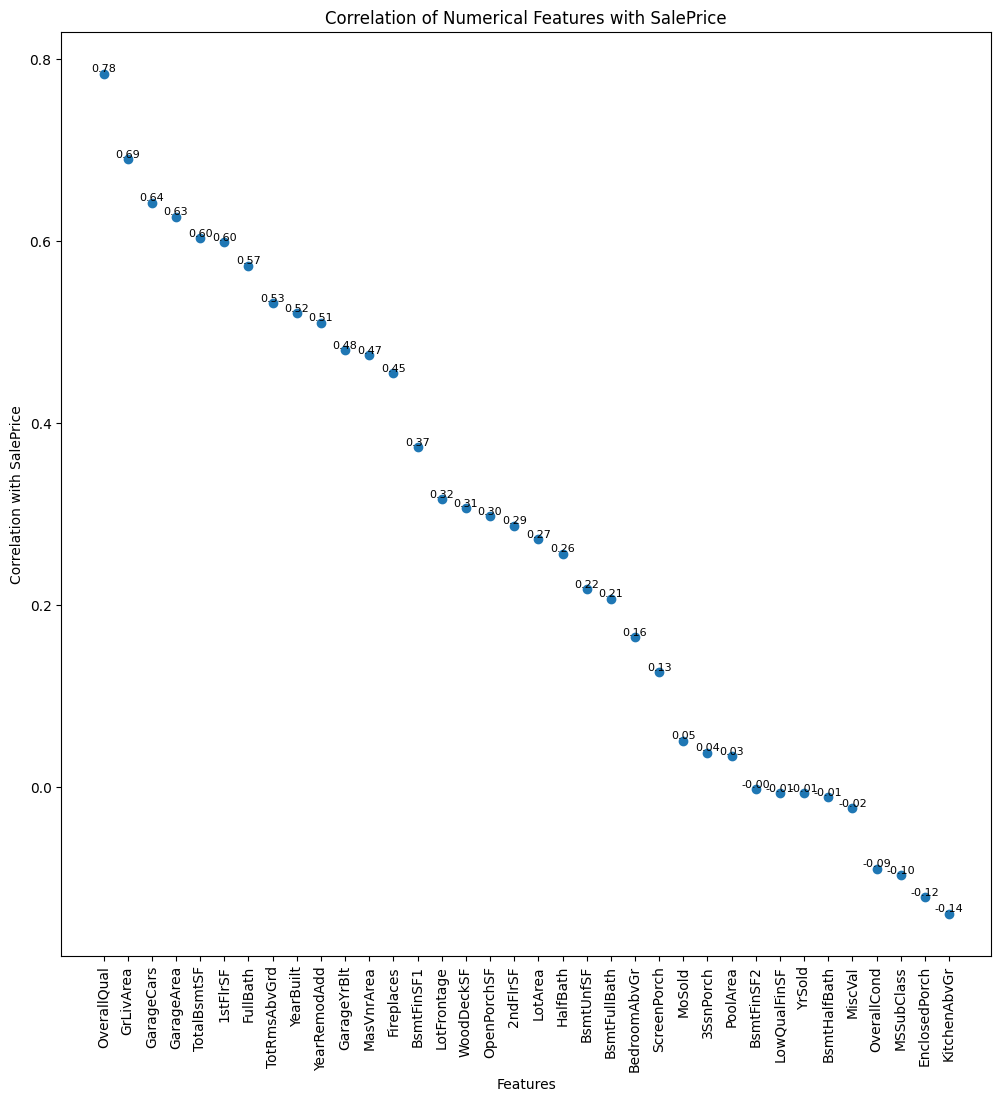

In [14]:
correlation_df = train_X[numerical_cols].corrwith(train_y).sort_values(ascending=False).reset_index()
correlation_df.columns = ['Feature', 'Correlation']

# Plot
plt.figure(figsize=(12,12))

plt.scatter(correlation_df['Feature'], correlation_df['Correlation'])

# Add y-axis values on each point
for i in range(len(correlation_df)):
    plt.text(
        correlation_df['Feature'][i],  # x-coordinate
        correlation_df['Correlation'][i],  # y-coordinate
        f"{correlation_df['Correlation'][i]:.2f}",  # Label text 
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=8,   # Font size
    )

plt.title('Correlation of Numerical Features with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation with SalePrice')

plt.xticks(rotation=90)
plt.show()

In [15]:
# Select numerical columns whose correlation > 0.4
high_correlation_num_cols = correlation_df[correlation_df['Correlation'] > 0.4]['Feature'].tolist()
print(high_correlation_num_cols)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']


### Explore Categorical Features
**Cardinality of Categorical Features**
* High-cardinality columns (e.g., Street or Neighborhood) may need encoding strategies like target encoding or one-hot encoding.


In [16]:
cardinality = X_train_full[categorical_cols].nunique().sort_values(ascending=False)
print(cardinality)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
Foundation        6
GarageType        6
Heating           6
BsmtFinType2      6
BsmtFinType1      6
SaleCondition     6
RoofStyle         6
BldgType          5
GarageCond        5
GarageQual        5
Electrical        5
HeatingQC         5
LotConfig         5
MSZoning          5
ExterCond         5
BsmtExposure      4
BsmtCond          4
ExterQual         4
BsmtQual          4
KitchenQual       4
LandContour       4
LotShape          4
LandSlope         3
GarageFinish      3
PavedDrive        3
Utilities         2
Street            2
CentralAir        2
dtype: int64


In [17]:
# Select low cardinality columns (fewer than 10 unique values)
low_cardinality_cat_cols = [cat_feature for cat_feature in cardinality.index if cardinality[cat_feature] < 10]
print(low_cardinality_cat_cols)

['SaleType', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl', 'Functional', 'Foundation', 'GarageType', 'Heating', 'BsmtFinType2', 'BsmtFinType1', 'SaleCondition', 'RoofStyle', 'BldgType', 'GarageCond', 'GarageQual', 'Electrical', 'HeatingQC', 'LotConfig', 'MSZoning', 'ExterCond', 'BsmtExposure', 'BsmtCond', 'ExterQual', 'BsmtQual', 'KitchenQual', 'LandContour', 'LotShape', 'LandSlope', 'GarageFinish', 'PavedDrive', 'Utilities', 'Street', 'CentralAir']


# Pipeline

In [18]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, high_correlation_num_cols),
        ('cat', categorical_transformer, low_cardinality_cat_cols)
    ])


# Model

In [19]:
model = RandomForestRegressor(random_state=1)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

clf.fit(train_X, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['OverallQual', 'GrLivArea',
                                                   'GarageCars', 'GarageArea',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   'FullBath', 'TotRmsAbvGrd',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'GarageYrBlt', 'MasVnrArea',
                                                   'Fireplaces']),
                                                 ('cat',
                                                  Pipeli...
                                                   'Foundation', 'GarageType',
                                                   'Heating', 'BsmtFinType2',
                                                   'BsmtFinType1',
                                                   'SaleCondition', 'RoofStyle',
                                                   'BldgType', 'GarageCond',
                                                   'GarageQual', 'Electrical',
                                                   'HeatingQC', 'LotConfig',
                                                   'MSZoning', 'ExterCond',
                                                   'BsmtExposure', 'BsmtCond',
                                                   'ExterQual', 'BsmtQual',
                                                   'KitchenQual', 'LandContour',
                                                   'LotShape', 'LandSlope',
                                                   'GarageFinish', ...])])),
                ('model', RandomForestRegressor(random_state=1))])

# Model Validation

In [20]:
preds = clf.predict(val_X)

print(f"Mean Absolute Error of Random Forest = {mean_absolute_error(val_y, preds)}")

Mean Absolute Error of Random Forest = 16787.02348173516


# Test Model with Test.csv

In [21]:
y_preds = clf.predict(X_test_full) 
y_preds[:5]

array([124394.66, 150822.  , 178369.8 , 189858.5 , 214264.36])

In [22]:
output = pd.DataFrame({'Id': X_test_full.index,
                       'SalePrice': y_preds})

output.to_csv('submission.csv', index=False)